In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
#import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df=pd.read_csv("../datatraining.csv", sep=";")

In [3]:
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,04/02/15 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,04/02/15 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,04/02/15 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,04/02/15 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,04/02/15 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
df.isnull().sum()

id               0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
dfLight=df.copy()

In [6]:
dfLight.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,04/02/15 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,04/02/15 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,04/02/15 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,04/02/15 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,04/02/15 17:55,23.10,27.2000,426.0,704.50,0.004757,1


In [7]:
dfLight.drop(['id', 'date', 'Temperature', 'Humidity', 'CO2', 'HumidityRatio', 'Occupancy'], axis=1, inplace =True)


In [8]:
dfLight.head()

,Light
0,426.0
1,429.5
2,426.0
3,426.0
4,426.0


In [9]:
df.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,04/02/15 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2,04/02/15 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,3,04/02/15 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,4,04/02/15 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,5,04/02/15 17:55,23.10,27.2000,426.0,704.50,0.004757,1


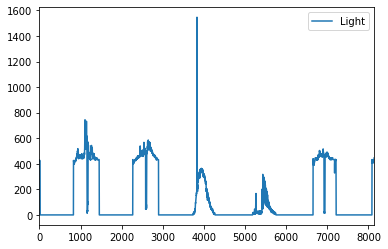

In [10]:
dfLight.plot()

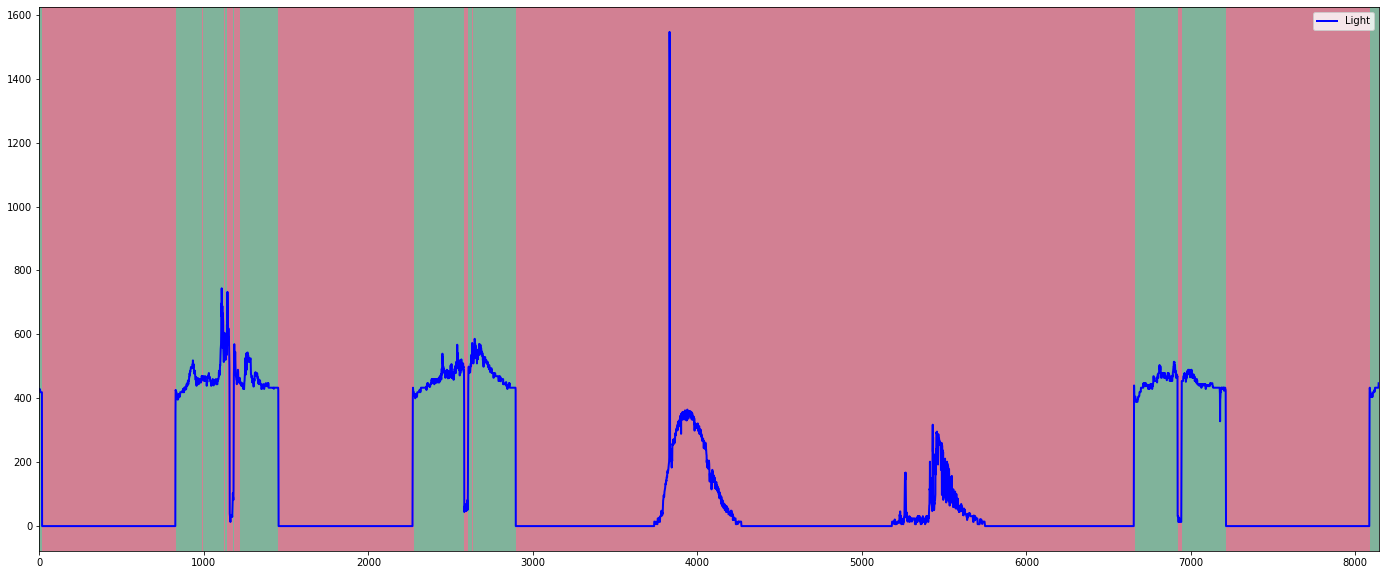

In [11]:
#df['Light'].plot(subplots=True, kind='line', linewidth=2, figsize=(24,10), color='red')
#plt.plot([0, 8200], [350, 350], color='navy', lw=2, linestyle='--')
ax = dfLight.plot(figsize=(24,10), linewidth=2, color='blue')
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
              df['Occupancy'].values[np.newaxis],
              cmap='RdYlGn', alpha=0.5)
#plt.plot([0, 8200], [370, 370], color='navy', lw=2, linestyle='--')
plt.show()

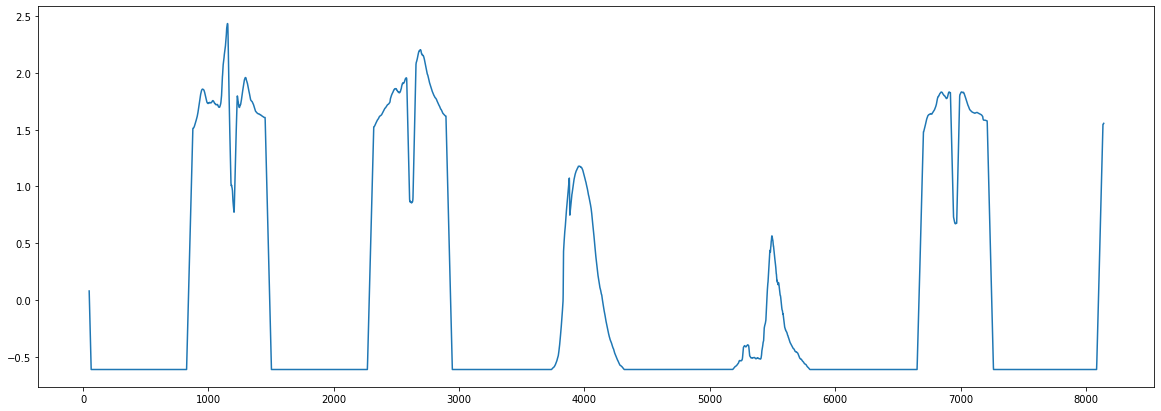

In [12]:
ts=df['Light']
w = 50
plt.figure(figsize=(20, 7))
plt.plot(((ts - ts.mean())/ts.std()).rolling(window=w).mean())
plt.show()

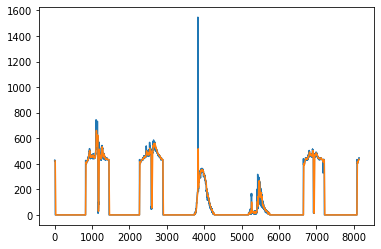

In [13]:
plt.plot(ts)
plt.plot(ts.rolling(window=12).mean())
plt.show()

In [14]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
dfLight

,Light
0,426.0
1,429.5
2,426.0
3,426.0
4,426.0
...,...
8138,433.0
8139,433.0
8140,433.0
8141,433.0


In [16]:
X=dfLight.values

In [17]:
X

array([[426. ],
       [429.5],
       [426. ],
       ...,
       [433. ],
       [433. ],
       [447. ]])

In [18]:
y=df['Occupancy'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
n_ts, ts_sz = dfLight.shape


In [20]:
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 8143
ts_sz 1
n_classes 2
shapelet_sizes {1: 3}


In [21]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [22]:
shp_clf.fit(X, y)

ValueError: Tensor-typed variable initializers must either be wrapped in an init_scope or callable (e.g., `tf.Variable(lambda : tf.truncated_normal([10, 40]))`) when building functions. Please file a feature request if this restriction inconveniences you.

In [ ]:
from pyts.datasets import make_cylinder_bell_funnel

In [ ]:
X, y = make_cylinder_bell_funnel(n_samples=12, random_state=42)

In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [ ]:
shp_clf.fit(X, y)